<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/Rakesh_Sir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
import tensorflow as tf
import xgboost as xgb
import seaborn as sns


In [2]:
df = pd.read_csv("Data_Sujal_New_Newtonian.csv")

In [3]:
df.shape

(72, 5)

In [4]:
df.columns

Index(['Freq', 'H_a', 'Lamda', 'K', 'Uf'], dtype='object')

In [5]:
df.head

<bound method NDFrame.head of     Freq  H_a  Lamda     K      Uf
0      1    1    0.0  10.0  0.0670
1      1    1    0.1  10.0  0.0720
2      1    1    0.3  10.0  0.0804
3      1    1    0.5  10.0  0.0870
4      1    2    0.0  10.0  0.0350
..   ...  ...    ...   ...     ...
67    10    2    0.5   0.1  0.1900
68    10    3    0.0   0.1  0.0923
69    10    3    0.1   0.1  0.0936
70    10    3    0.3   0.1  0.0956
71    10    3    0.5   0.1  0.0970

[72 rows x 5 columns]>

In [6]:
df['Uf'].unique()

array([0.067 , 0.072 , 0.0804, 0.087 , 0.035 , 0.0358, 0.0376, 0.039 ,
       0.0188, 0.019 , 0.0194, 0.0197, 0.27  , 0.289 , 0.322 , 0.352 ,
       0.139 , 0.143 , 0.15  , 0.156 , 0.075 , 0.0764, 0.078 , 0.0792,
       0.334 , 0.357 , 0.398 , 0.434 , 0.171 , 0.177 , 0.1863, 0.193 ,
       0.093 , 0.0943, 0.0964, 0.0978, 0.065 , 0.0702, 0.0849, 0.0342,
       0.0353, 0.037 , 0.0384, 0.0186, 0.0189, 0.0193, 0.0196, 0.2643,
       0.2815, 0.312 , 0.34  , 0.137 , 0.141 , 0.148 , 0.154 , 0.0748,
       0.0758, 0.0774, 0.0785, 0.326 , 0.347 , 0.386 , 0.42  , 0.169 ,
       0.174 , 0.183 , 0.19  , 0.0923, 0.0936, 0.0956, 0.097 ])

In [7]:
collist= df.columns

In [8]:
collist

Index(['Freq', 'H_a', 'Lamda', 'K', 'Uf'], dtype='object')

In [9]:
for a in collist:
  print(a)

Freq
H_a
Lamda
K
Uf


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
df_scaled=df.copy()

In [13]:
df_scaled[['Freq', 'H_a', 'Lamda', 'K', 'Uf']] = scaler.fit_transform(df[['Freq', 'H_a', 'Lamda', 'K', 'Uf']])

In [14]:
df = df_scaled 

In [15]:
df_scaled.corr() 

,Freq,H_a,Lamda,K,Uf
Freq,1.000000e+00,-1.541976e-17,9.251859e-18,-3.700743e-17,0.595097
H_a,-1.541976e-17,1.000000e+00,1.233581e-17,3.083953e-17,-0.659858
Lamda,9.251859e-18,1.233581e-17,1.000000e+00,-6.167906e-18,0.090760
K,-3.700743e-17,3.083953e-17,-6.167906e-18,1.000000e+00,0.013729
Uf,5.950970e-01,-6.598575e-01,9.076046e-02,1.372948e-02,1.000000


In [16]:
#sns.heatmap(df_scaled.corr(), cmap="RdBu", annot=True, linewidth=0.5)

In [17]:
#sns.set_style('darkgrid')

In [18]:
#sns.pairplot(df);

In [19]:
#sns.pairplot(df, diag_kind = 'kde');

In [20]:
#sns.pairplot(df, kind = 'reg');

In [21]:
#g=sns.pairplot(df)
#g.map_upper(sns.kdeplot, n_leve=4, color='xkcd:wine red');

In [22]:
df.isnull().sum()

Freq     0
H_a      0
Lamda    0
K        0
Uf       0
dtype: int64

In [23]:
classes=df['Uf'].unique()
classes

array([-0.67456062, -0.63154398, -0.55927603, -0.50249407, -0.9498671 ,
       -0.94298443, -0.92749844, -0.91545379, -1.089241  , -1.08752034,
       -1.084079  , -1.08149801,  1.07191486,  1.23537808,  1.51928788,
        1.77738771, -0.05512104, -0.02070773,  0.03951556,  0.09113553,
       -0.605734  , -0.59368934, -0.57992402, -0.56960002,  1.62252781,
        1.82040434,  2.17314077,  2.48286056,  0.22018544,  0.2718054 ,
        0.35181635,  0.40945864, -0.4508741 , -0.43968978, -0.42162279,
       -0.40957813, -0.69176727, -0.64702997, -0.52056106, -0.95674976,
       -0.9472861 , -0.93266044, -0.92061578, -1.09096167, -1.08838067,
       -1.08493934, -1.08235834,  1.02287589,  1.17085312,  1.43325461,
        1.67414778, -0.0723277 , -0.03791439,  0.02230891,  0.07392887,
       -0.60745466, -0.59885134, -0.58508601, -0.57562235,  1.55370119,
        1.73437107,  2.06990084,  2.36241397,  0.20297878,  0.24599542,
        0.32342537,  0.38364866, -0.45689643, -0.44571211, -0.42

In [24]:
df['Uf'].value_counts()

-0.579924    2
-0.674561    1
-0.691767    1
-0.072328    1
 1.674148    1
            ..
 0.351816    1
 0.409459    1
-0.450874    1
-0.439690    1
-0.416461    1
Name: Uf, Length: 71, dtype: int64

In [25]:
#df['MAR'].value_counts().plot.bar()

In [26]:
X = df.iloc[:, :-1].values

In [27]:
y=df.iloc[:, -1].values 
y=y.astype('int')

In [28]:
from sklearn.model_selection import train_test_split 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [30]:
X_train.shape, X_test.shape

((50, 4), (22, 4))

# **SUJAL WORK AHEAD**

####Accuracy by Cross_val_score 
####Random Forest: 70%
####KNN: 64% 
####XGBoost: 61%

In [31]:
#Using K nearest neighbours Random Forest
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(criterion='entropy',n_estimators=95)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=95)

In [32]:
rfc.score(X_test,y_test)

0.8181818181818182

In [33]:
Yrfc_pred = rfc.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,Yrfc_pred)

array([[ 3,  2,  0,  0],
       [ 0, 12,  0,  0],
       [ 0,  0,  3,  0],
       [ 0,  0,  2,  0]])

In [35]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion':['gini','entropy'],'n_estimators':np.arange(1,100)}]
grid_search = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv=10)

In [36]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc,X = X_train, y = y_train, cv = 10, n_jobs=-1)
mean_data = accuracies.mean()
mean_data

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


0.9200000000000002

In [37]:
#Using cross validation to find the percentage accuracy in Random Forest
from sklearn.metrics import accuracy_score
random_forest_accuracy_score = accuracy_score(y_test,Yrfc_pred)
random_forest_accuracy_score

0.8181818181818182

In [38]:
#Using K nearest neighbours KNN 
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(X_train, y_train)
param_grid = {'n_neighbors': [5,10,15,25,30,50]}
grid_knn = GridSearchCV(knnc,param_grid,scoring='accuracy',cv=10,refit=True)

In [39]:
#Using cross validation to find the percentage accuracy in KNN 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knnc,X = X_train, y = y_train, cv = 10, n_jobs=-1)
mean_accuracy_knnc = accuracies.mean()
mean_accuracy_knnc

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


0.76

In [40]:
Yknn_pred=knnc.predict(X_test)
from sklearn.metrics import accuracy_score
KNN_accuracy_score = accuracy_score(y_test,Yknn_pred)
KNN_accuracy_score

0.6818181818181818

In [41]:
#Stopping the randomness
tf.random.set_seed(0)

In [42]:
#Using XGB boost  XGB boost 
import xgboost as xgb
xgbc = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgbc.fit(X_train,y_train)

XGBClassifier(learning_rate=0.01, objective='multi:softprob', random_state=1)

In [43]:
xgbc_predictions = xgbc.predict(X_test)

In [44]:
#Using confusion matrix
confusion_matrix_accuracy = confusion_matrix(y_test,xgbc_predictions)
confusion_matrix_accuracy

array([[ 5,  0,  0,  0],
       [ 0, 12,  0,  0],
       [ 0,  0,  3,  0],
       [ 0,  0,  2,  0]])

In [45]:
#Using cross validation to find the percentage accuracy in XGB boost 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgbc,X = X_train, y = y_train, cv = 10, n_jobs=-1)
mean_accuracy_xgb = accuracies.mean()
mean_accuracy_xgb

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


0.86

In [46]:
#Accuracy score of the XGB 
XGB_accuracy_score = accuracy_score(y_test,xgbc_predictions)
XGB_accuracy_score

0.9090909090909091

### **ROC Curve of KNN, XGBoost and Random Forest**

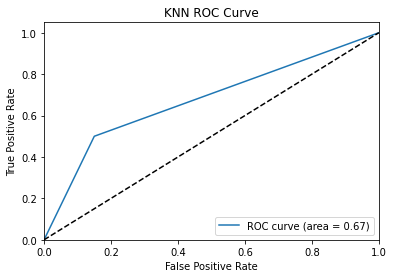

<Figure size 432x288 with 0 Axes>

In [47]:
predictionsknnc=knnc.predict(X_test)

from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,predictionsknnc, pos_label=2)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()
resolution_value = 600
plt.savefig("KNN ROC Curve.png", format="png", dpi=resolution_value)

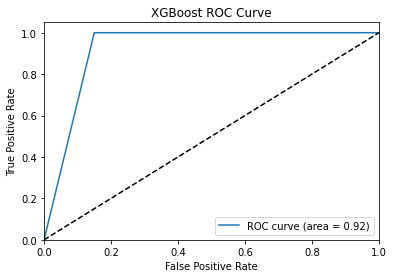

<Figure size 432x288 with 0 Axes>

In [48]:
predictionsxgbc=xgbc.predict(X_test)

from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,predictionsxgbc, pos_label=2)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")
plt.show()
resolution_value = 600
plt.savefig("XGBoost ROC Curve.png", format="png", dpi=resolution_value)

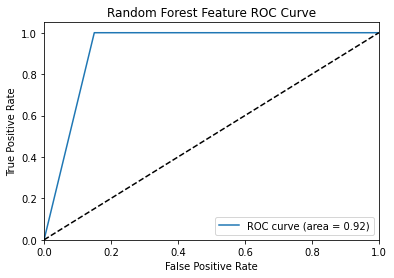

<Figure size 432x288 with 0 Axes>

In [49]:
pred_rf=rfc.predict(X_test)

from sklearn.metrics import roc_curve,auc

fpr,tpr,_=roc_curve(y_test,pred_rf, pos_label=2)

roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Feature ROC Curve')
plt.legend(loc="lower right")
plt.show()
resolution_value = 600
plt.savefig("Random Forest Feature ROC Curve.png", format="png", dpi=resolution_value)


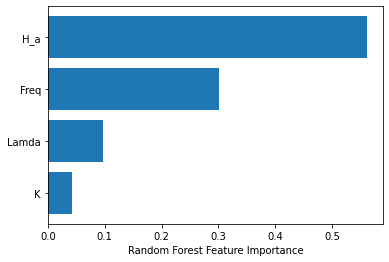

In [50]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rfc, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
resolution_value = 600
plt.savefig("Random Forest Feature Importance.png", format="png", dpi=resolution_value)

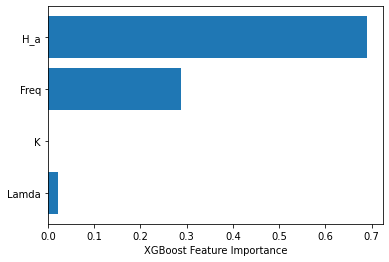

In [51]:
from sklearn.inspection import permutation_importance
perm_importance2 = permutation_importance(xgbc, X_test, y_test)
sorted_idx = perm_importance2.importances_mean.argsort()
plt.barh(df.columns[sorted_idx], xgbc.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
resolution_value = 600
plt.savefig("XGBoost Feature Importance.png", format="png", dpi=resolution_value)